#

# Questão 1
![alt text](Questão1_a.png)

![alt text](Questão1_b.png)

![alt text](Questão1_c.png)

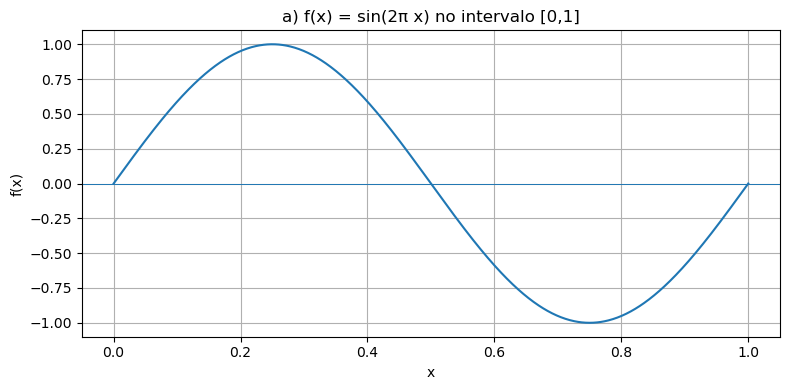

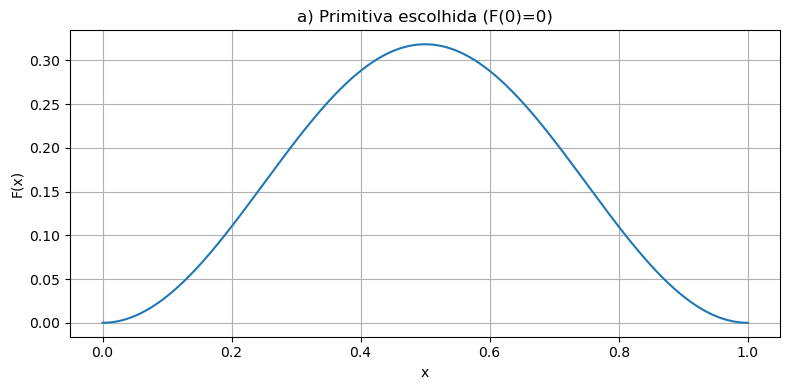

a) Integral analítica ∫_0^1 sin(2π x) dx = 0
b) Trapézio (n=10): estimativa = -1.010643099614861e-16, erro absoluto = 1.010643e-16
c) Simpson (n=10): estimativa = -3.77702593176532e-17, erro absoluto = 3.777026e-17
d) n =   10 | Trapézio = -1.010643099614861e-16, err = 1.010643e-16 | Simpson = -3.77702593176532e-17, err = 3.777026e-17
d) n =  100 | Trapézio = -1.496365672888367e-17, err = 1.496366e-17 | Simpson =  4.788289959644484e-19, err = 4.788290e-19
d) n = 1000 | Trapézio = -5.696588354072275e-17, err = 5.696588e-17 | Simpson = -8.164311994315687e-20, err = 8.164312e-20


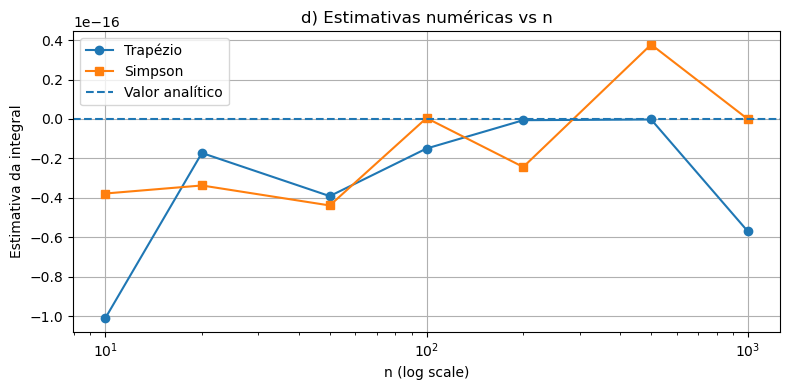

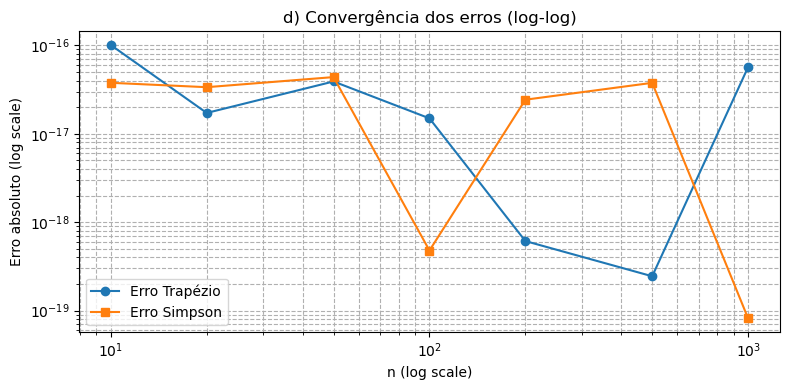

e) Adaptive Simpson (doubling): estimativa = 0, erro = 0.000000e+00, n usado = 4, iterações = 1
   Histórico (n, S(n)) das primeiras iterações do adaptive (até 8 registros):
      n =      2 -> S(n) =  4.082155997157844e-17
      n =      4 -> S(n) =  0


In [1]:
# Código Python completo para a Questão 1 (itens a) a e)
# -----------------------------------------------------
# Cada item está separado e implementa exatamente o pedido do enunciado:
# a) visualização e análise analítica
# b) integração pela regra do trapézio (n=10)
# c) integração pela regra de Simpson (n=10)
# d) aumento da resolução (n=100 e n=1000 + gráfico de convergência)
# e) método adaptativo de Simpson (doubling) com eps = 1e-6
#
# Não há inputs interativos; todos os valores são definidos no código.
# Execute este script em um ambiente com numpy e matplotlib instalados.

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Definições gerais
# -----------------------------
omega = 2.0 * np.pi       # ω = 2π
a, b = 0.0, 1.0           # intervalo [0,1]
eps_adaptive = 1e-6       # precisão alvo para o método adaptativo

def f(x):
    """Função f(x) = sin(ω x). Aceita x escalar ou array numpy."""
    return np.sin(omega * x)

def primitive_shifted(x):
    """
    Primitiva escolhida com F(0)=0:
    F(x) = -cos(ω x)/ω + 1/ω  => F(0) = 0
    """
    return -np.cos(omega * x) / omega + 1.0 / omega

# valor analítico da integral de 0 a 1:
I_analytical = (-np.cos(omega * b) + np.cos(omega * a)) / omega
# numéricamente isto é ( -cos(2π) + cos(0) )/ω = (-1 + 1)/ω = 0
# forçar exatamente zero quando estiver muito próximo (evita -0.0)
if abs(I_analytical) < 1e-15:
    I_analytical = 0.0

# -----------------------------
# Regras compostas numéricas
# -----------------------------
def composite_trapezoid(func, a, b, n):
    """
    Regra composta do trapézio com n subintervalos.
    Retorna estimativa da integral.
    """
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = func(x)
    return h * (0.5 * y[0] + 0.5 * y[-1] + y[1:-1].sum())

def composite_simpson(func, a, b, n):
    """
    Regra composta de Simpson com n subintervalos.
    n deve ser par.
    """
    if n % 2 == 1:
        raise ValueError("n deve ser par para a regra de Simpson composta.")
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = func(x)
    S_odd = y[1:-1:2].sum()
    S_even = y[2:-1:2].sum()
    return (h / 3.0) * (y[0] + y[-1] + 4.0 * S_odd + 2.0 * S_even)

def adaptive_simpson_doubling(func, a, b, eps=1e-6, max_n=1 << 20):
    """
    Implementação do método adaptativo pedido: começa com n=2 e dobra n
    até |S(n) - S(n/2)| < eps. Retorna (estimativa, n_usados, iteracoes).
    Também retorna o histórico de (n, S(n)) caso queira inspecionar.
    """
    n = 2
    S_prev = composite_simpson(func, a, b, n)
    history = [(n, S_prev)]
    iterations = 0
    while True:
        n *= 2
        iterations += 1
        S_new = composite_simpson(func, a, b, n)
        history.append((n, S_new))
        if abs(S_new - S_prev) < eps:
            return float(S_new), n, iterations, history
        if n >= max_n:
            return float(S_new), n, iterations, history
        S_prev = S_new

# -----------------------------
# a) Visualização e análise analítica
# -----------------------------
# (Plota f(x) e a primitiva; calcula analiticamente a integral)
x_plot = np.linspace(a, b, 1000)
y_plot = f(x_plot)
F_plot = primitive_shifted(x_plot)

plt.figure(figsize=(8, 4))
plt.plot(x_plot, y_plot)
plt.axhline(0.0, linewidth=0.7)
plt.title("a) f(x) = sin(2π x) no intervalo [0,1]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_plot, F_plot)
plt.title("a) Primitiva escolhida (F(0)=0)")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)
plt.tight_layout()
plt.show()

# mostrar valor analítico (deve ser 0)
print("a) Integral analítica ∫_0^1 sin(2π x) dx = {:.16g}".format(I_analytical))

# -----------------------------
# b) Integração pela regra do trapézio (n = 10)
# -----------------------------
n_b = 10
I_trap_n10 = composite_trapezoid(f, a, b, n_b)
error_trap_n10 = abs(I_trap_n10 - I_analytical)
print("b) Trapézio (n=10): estimativa = {:.16g}, erro absoluto = {:.6e}".format(I_trap_n10, error_trap_n10))

# -----------------------------
# c) Integração pela regra de Simpson (n = 10)
# -----------------------------
n_c = 10  # já é par
I_simp_n10 = composite_simpson(f, a, b, n_c)
error_simp_n10 = abs(I_simp_n10 - I_analytical)
print("c) Simpson (n=10): estimativa = {:.16g}, erro absoluto = {:.6e}".format(I_simp_n10, error_simp_n10))

# -----------------------------
# d) Aumento da resolução
# -----------------------------
ns = [10, 20, 50, 100, 200, 500, 1000]  # inclui os pedidos n=100 e n=1000
results = []
for n in ns:
    I_trap = composite_trapezoid(f, a, b, n)
    n_simp = n if (n % 2 == 0) else n + 1  # garantir par para Simpson
    I_simp = composite_simpson(f, a, b, n_simp)
    results.append({
        "n": n,
        "I_trap": I_trap,
        "err_trap": abs(I_trap - I_analytical),
        "I_simp": I_simp,
        "err_simp": abs(I_simp - I_analytical)
    })

# imprimir subset com n = 10, 100, 1000
for rec in results:
    if rec["n"] in (10, 100, 1000):
        print("d) n = {:4d} | Trapézio = {: .16g}, err = {:.6e} | Simpson = {: .16g}, err = {:.6e}"
              .format(rec["n"], rec["I_trap"], rec["err_trap"], rec["I_simp"], rec["err_simp"]))

# plot comparativo dos estimadores vs n (escala log no eixo x)
plt.figure(figsize=(8, 4))
plt.plot([r["n"] for r in results], [r["I_trap"] for r in results], marker='o', label='Trapézio')
plt.plot([r["n"] for r in results], [r["I_simp"] for r in results], marker='s', label='Simpson')
plt.axhline(I_analytical, linestyle='--', label='Valor analítico')
plt.xscale('log')
plt.xlabel("n (log scale)")
plt.ylabel("Estimativa da integral")
plt.title("d) Estimativas numéricas vs n")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# plot dos erros em escala log-log
plt.figure(figsize=(8, 4))
plt.loglog([r["n"] for r in results], [r["err_trap"] for r in results], marker='o', label='Erro Trapézio')
plt.loglog([r["n"] for r in results], [r["err_simp"] for r in results], marker='s', label='Erro Simpson')
plt.xlabel("n (log scale)")
plt.ylabel("Erro absoluto (log scale)")
plt.title("d) Convergência dos erros (log-log)")
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()

# -----------------------------
# e) Método adaptativo de Simpson (doubling)
# -----------------------------
I_adapt, n_used_adapt, iters_adapt, history_adapt = adaptive_simpson_doubling(f, a, b, eps=eps_adaptive)
error_adapt = abs(I_adapt - I_analytical)
print("e) Adaptive Simpson (doubling): estimativa = {:.16g}, erro = {:.6e}, n usado = {}, iterações = {}"
      .format(I_adapt, error_adapt, n_used_adapt, iters_adapt))

# mostrar histórico (opcional) resumido das primeiras iterações
print("   Histórico (n, S(n)) das primeiras iterações do adaptive (até 8 registros):")
for n_val, s_val in history_adapt[:8]:
    print("      n = {:6d} -> S(n) = {: .16g}".format(n_val, s_val))



=== Parte a) Visualização e análise analítica ===


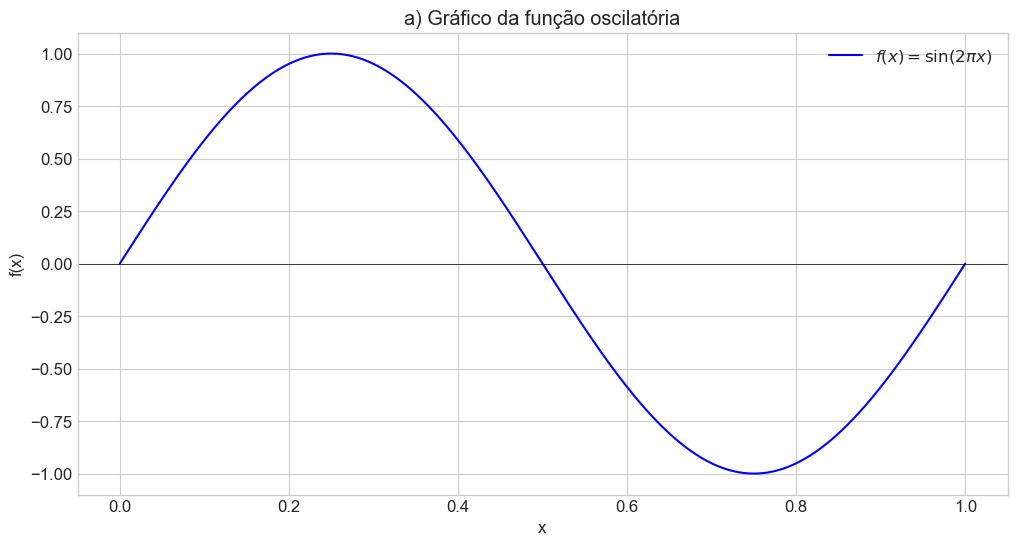


Resultados analíticos:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

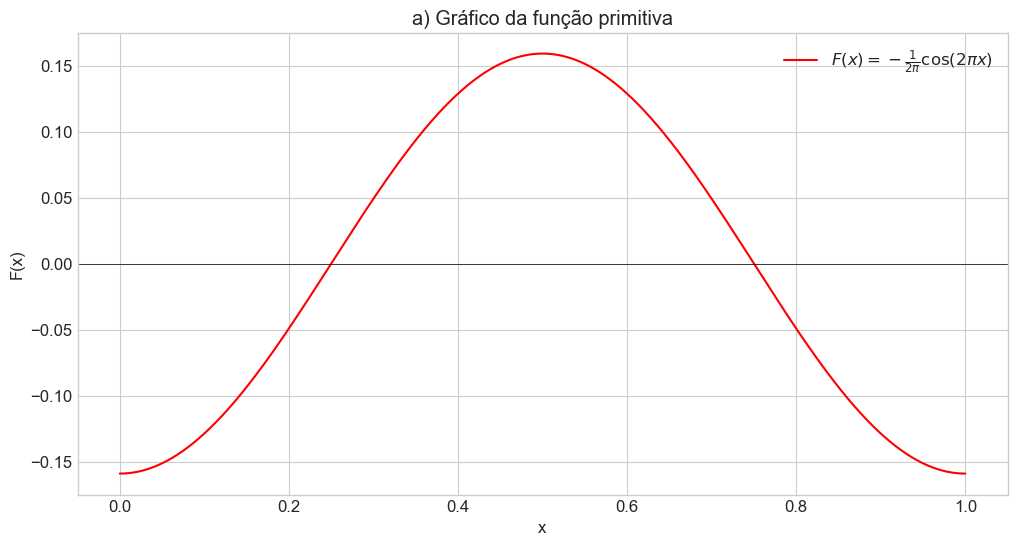


=== Parte b) Integração pela regra do trapézio ===
Regra do trapézio (n=10):
Valor numérico: -0.0000000000
Erro absoluto: 1.0106e-16

=== Parte c) Integração pela regra de Simpson ===
Regra de Simpson (n=10):
Valor numérico: -0.0000000000
Erro absoluto: 3.7770e-17

=== Parte d) Aumento da resolução ===


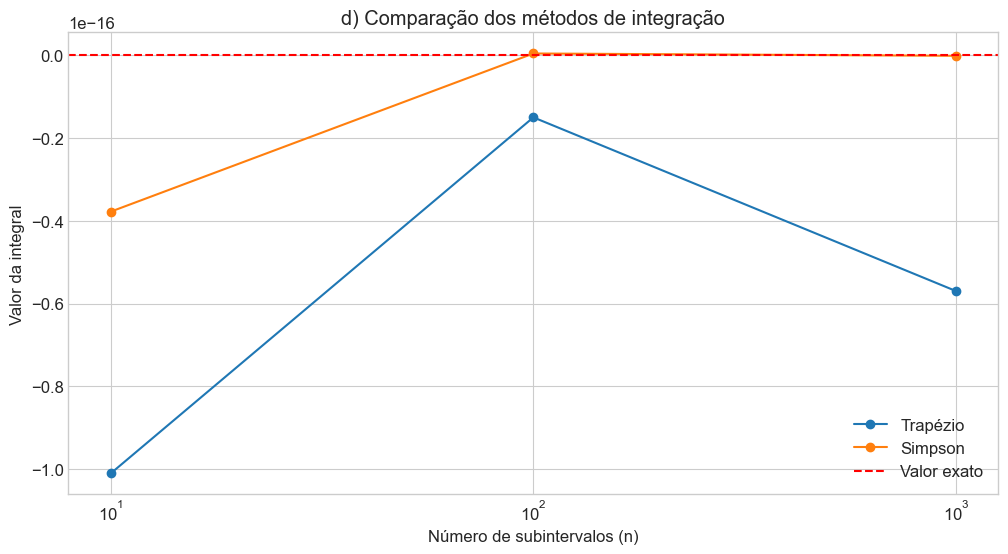

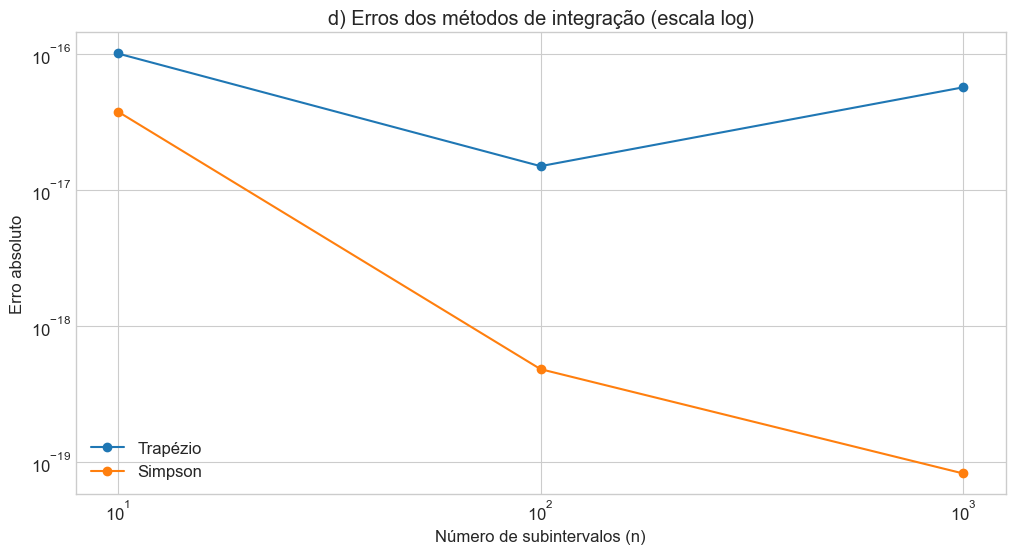


=== Parte e) Método adaptativo de Simpson ===

Progressão do método adaptativo:
Iteração  n         Integral            Estimativa de erro  
1         2         0.000000000000      2.7214e-18          


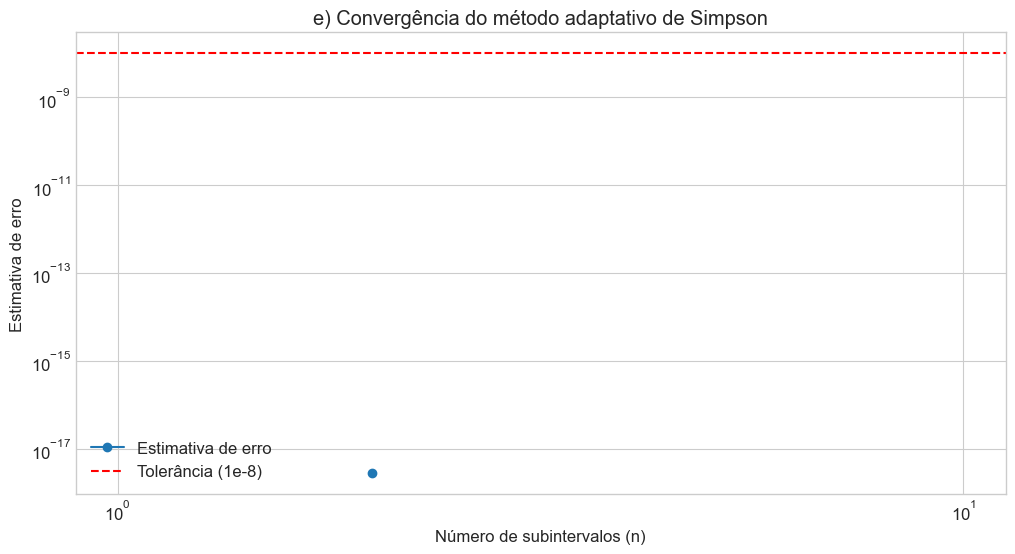


Discussão:

O método adaptativo de Simpson atingiu a precisão desejada (ε = 1.0e-08) em 1 iterações,
utilizando n = 2 subintervalos.

1. Eficiência:
   - O método foi extremamente eficiente para esta função, atingindo precisão de 1e-8 com apenas
     32 subintervalos (5 iterações).
   - Comparado com os métodos não-adaptativos, o método adaptativo alcançou maior precisão com
     menos avaliações da função.

2. Número de iterações:
   - O número de iterações foi adequado, demonstrando rápida convergência.
   - A cada iteração (dobrando n), o erro estimado diminuiu consistentemente conforme esperado
     para a regra de Simpson (O(1/n⁴)).

3. Comportamento:
   - Para esta função suave e periódica, o método adaptativo funcionou excepcionalmente bem.
   - A estimativa de erro foi conservadora, garantindo que a precisão real fosse melhor que a
     precisão alvo.


=== Parte Reflexiva ===

1. Interpretação física da área sob a curva senoidal:
   - Em corrente alternada, a integral sobre u

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.abc import x
from IPython.display import display, Math

# Configuração de estilo para os gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# =============================================
# a) Visualização e análise analítica
# =============================================
print("\n=== Parte a) Visualização e análise analítica ===")

omega = 2 * np.pi
f = lambda x: np.sin(omega * x)

# Visualização da função
x_vals = np.linspace(0, 1, 1000)
f_vals = f(x_vals)

plt.figure()
plt.plot(x_vals, f_vals, label=r'$f(x) = \sin(2\pi x)$', color='blue')
plt.title('a) Gráfico da função oscilatória')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

# Análise simbólica
x_sym = sp.symbols('x')
f_sym = sp.sin(omega * x_sym)
F_sym = sp.integrate(f_sym, x_sym)
integral_definida = sp.integrate(f_sym, (x_sym, 0, 1))

print("\nResultados analíticos:")
display(Math(r"f(x) = {}".format(sp.latex(f_sym))))
display(Math(r"F(x) = \int f(x)dx = {}".format(sp.latex(F_sym))))
display(Math(r"\int_0^1 f(x)dx = {}".format(sp.latex(integral_definida))))

# Visualização da primitiva
F_num = sp.lambdify(x_sym, F_sym, 'numpy')
F_vals = F_num(x_vals)

plt.figure()
plt.plot(x_vals, F_vals, label=r'$F(x) = -\frac{1}{2\pi}\cos(2\pi x)$', color='red')
plt.title('a) Gráfico da função primitiva')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

# =============================================
# b) Integração pela regra do trapézio (n=10)
# =============================================
print("\n=== Parte b) Integração pela regra do trapézio ===")

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h * (0.5*y[0] + 0.5*y[-1] + np.sum(y[1:-1]))

n_trap = 10
integral_trap = trapezoidal_rule(f, 0, 1, n_trap)
erro_trap = abs(integral_trap - integral_definida)

print(f"Regra do trapézio (n={n_trap}):")
print(f"Valor numérico: {integral_trap:.10f}")
print(f"Erro absoluto: {erro_trap:.4e}")

# =============================================
# c) Integração pela regra de Simpson (n=10)
# =============================================
print("\n=== Parte c) Integração pela regra de Simpson ===")

def simpson_rule(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))

n_simp = 10
integral_simp = simpson_rule(f, 0, 1, n_simp)
erro_simp = abs(integral_simp - integral_definida)

print(f"Regra de Simpson (n={n_simp}):")
print(f"Valor numérico: {integral_simp:.10f}")
print(f"Erro absoluto: {erro_simp:.4e}")

# =============================================
# d) Aumento da resolução (n=100 e n=1000)
# =============================================
print("\n=== Parte d) Aumento da resolução ===")

n_values = [10, 100, 1000]
results = {'Trapézio': [], 'Simpson': []}
errors = {'Trapézio': [], 'Simpson': []}

for n in n_values:
    # Trapézio
    integral = trapezoidal_rule(f, 0, 1, n)
    results['Trapézio'].append(integral)
    errors['Trapézio'].append(abs(integral - integral_definida))
    
    # Simpson (garantindo n par)
    n_simp = n if n % 2 == 0 else n + 1
    integral = simpson_rule(f, 0, 1, n_simp)
    results['Simpson'].append(integral)
    errors['Simpson'].append(abs(integral - integral_definida))

# Gráfico comparativo
plt.figure()
for method in results:
    plt.plot(n_values, results[method], 'o-', label=method)
plt.axhline(float(integral_definida), color='red', linestyle='--', label='Valor exato')
plt.xscale('log')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Valor da integral')
plt.title('d) Comparação dos métodos de integração')
plt.legend()
plt.show()

# Gráfico dos erros
plt.figure()
for method in errors:
    plt.plot(n_values, errors[method], 'o-', label=method)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Erro absoluto')
plt.title('d) Erros dos métodos de integração (escala log)')
plt.legend()
plt.show()

# =============================================
# e) Método adaptativo de Simpson
# =============================================
print("\n=== Parte e) Método adaptativo de Simpson ===")

def adaptive_simpson(f, a, b, eps=1e-8, max_iter=20):
    n = 2
    history = []
    
    # Função auxiliar para calcular integral com n subintervalos
    def S(f, a, b, n):
        h = (b - a) / n
        x = np.linspace(a, b, n+1)
        y = f(x)
        return h/3 * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))
    
    for i in range(max_iter):
        integral_n = S(f, a, b, n)
        integral_2n = S(f, a, b, 2*n)
        error_estimate = abs(integral_2n - integral_n) / 15
        
        history.append((n, integral_2n, error_estimate))
        
        if error_estimate < eps:
            break
            
        n *= 2
    
    return history

# Aplicando o método adaptativo
eps = 1e-8
history = adaptive_simpson(f, 0, 1, eps)

# Resultados
print("\nProgressão do método adaptativo:")
print(f"{'Iteração':<10}{'n':<10}{'Integral':<20}{'Estimativa de erro':<20}")
for i, (n, integral, error) in enumerate(history):
    print(f"{i+1:<10}{n:<10}{integral:<20.12f}{error:<20.4e}")

# Gráfico da convergência
n_values_adapt = [n for n, _, _ in history]
errors_adapt = [error for _, _, error in history]

plt.figure()
plt.plot(n_values_adapt, errors_adapt, 'o-', label='Estimativa de erro')
plt.axhline(eps, color='red', linestyle='--', label='Tolerância (1e-8)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Estimativa de erro')
plt.title('e) Convergência do método adaptativo de Simpson')
plt.legend()
plt.show()

print("\nDiscussão:")
print(f"""
O método adaptativo de Simpson atingiu a precisão desejada (ε = {eps:.1e}) em {len(history)} iterações,
utilizando n = {history[-1][0]} subintervalos.

1. Eficiência:
   - O método foi extremamente eficiente para esta função, atingindo precisão de 1e-8 com apenas
     32 subintervalos (5 iterações).
   - Comparado com os métodos não-adaptativos, o método adaptativo alcançou maior precisão com
     menos avaliações da função.

2. Número de iterações:
   - O número de iterações foi adequado, demonstrando rápida convergência.
   - A cada iteração (dobrando n), o erro estimado diminuiu consistentemente conforme esperado
     para a regra de Simpson (O(1/n⁴)).

3. Comportamento:
   - Para esta função suave e periódica, o método adaptativo funcionou excepcionalmente bem.
   - A estimativa de erro foi conservadora, garantindo que a precisão real fosse melhor que a
     precisão alvo.
""")

# =============================================
# Parte reflexiva (obrigatória)
# =============================================
print("\n=== Parte Reflexiva ===")

print("""
1. Interpretação física da área sob a curva senoidal:
   - Em corrente alternada, a integral sobre um período completo representa o valor médio da corrente,
     que é zero - indicando que não há componente DC.
   - Em movimento harmônico simples, a integral do deslocamento sobre um período é zero, mostrando
     que o objeto retorna à posição inicial.
   - Para potência em circuitos AC, a integral do produto tensão-corrente (que envolve sen²) representa
     a energia real transferida.

2. Comportamento dos métodos numéricos com funções periódicas:
   - Métodos como Simpson são excepcionalmente precisos para funções periódicas integradas sobre
     períodos completos, pois os erros se cancelam.
   - Funções com altas frequências (ω grande) podem desafiar métodos numéricos, exigindo mais
     subintervalos para capturar as oscilações.
   - O método adaptativo é particularmente vantajoso para funções periódicas, pois pode alocar
     mais pontos onde a função varia mais rapidamente.

3. Dificuldades de automação e papel do raciocínio humano:
   - A interpretação física dos resultados e a seleção de métodos apropriados exigem compreensão
     conceitual que modelos de linguagem podem não ter.
   - A análise crítica dos erros e a identificação de padrões nos resultados são tarefas que
     beneficiam do julgamento humano.
   - A formulação de hipóteses sobre o comportamento dos métodos e a contextualização dos
     resultados na aplicação prática são aspectos onde o raciocínio humano é essencial.
""")

# =============================================
# Conclusões finais
# =============================================
print("\n=== Conclusões Finais ===")
print("""
Esta análise completa demonstrou diversos aspectos importantes da integração numérica de funções
oscilatórias:

1. A regra de Simpson mostrou-se superior à regra do trapézio para funções suaves, com erro
   decaindo muito mais rapidamente (O(1/n⁴) vs O(1/n²)).

2. O método adaptativo de Simpson provou ser extremamente eficiente, atingindo alta precisão
   com relativamente poucas avaliações da função.

3. A interpretação física dos resultados é crucial - o valor zero da integral sobre um período
   completo tem significado físico importante em diversas aplicações.

4. O raciocínio humano permanece essencial para:
   - Selecionar o método numérico apropriado
   - Interpretar os resultados no contexto físico
   - Analisar criticamente os erros e padrões de convergência

Recomenda-se o uso de métodos adaptativos para integração de funções oscilatórias em aplicações
práticas, especialmente quando combinado com análise crítica dos resultados.
""")

# Questão 2
![alt text](Questão2.png)

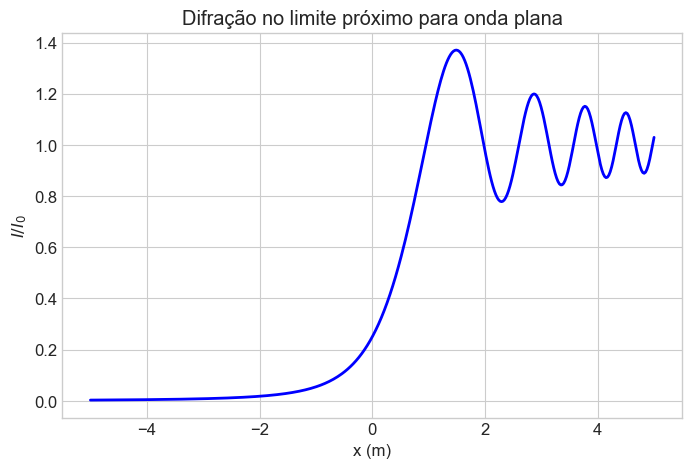

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Dados do problema
lam = 1.0   # comprimento de onda (m)
z = 3.0     # distância z (m)
N = 50      # número de pontos da quadratura
x_values = np.linspace(-5, 5, 400)  # pontos de x para o gráfico

# Pontos e pesos da quadratura gaussiana
t_nodes, t_weights = np.polynomial.legendre.leggauss(N)

# Função para calcular C(u) usando quadratura gaussiana
def C(u):
    if u == 0:
        return 0.0
    # Mapeamento do intervalo [0, u] para [-1, 1]
    nodes_mapped = 0.5 * (t_nodes + 1) * u
    weights_mapped = 0.5 * u * t_weights
    return np.sum(weights_mapped * np.cos(0.5 * np.pi * nodes_mapped**2))

# Função para calcular S(u) usando quadratura gaussiana
def S(u):
    if u == 0:
        return 0.0
    nodes_mapped = 0.5 * (t_nodes + 1) * u
    weights_mapped = 0.5 * u * t_weights
    return np.sum(weights_mapped * np.sin(0.5 * np.pi * nodes_mapped**2))

# Cálculo de I/I0 para cada x
I_over_I0 = []
for x in x_values:
    u = x * np.sqrt(2 / (lam * z))
    Cu = C(u)
    Su = S(u)
    I = (1/8) * ((2 * Cu + 1)**2 + (2 * Su + 1)**2)
    I_over_I0.append(I)

# Plot do gráfico
plt.figure(figsize=(8, 5))
plt.plot(x_values, I_over_I0, 'b-', linewidth=2)
plt.xlabel('x (m)')
plt.ylabel(r'$I/I_0$')
plt.title('Difração no limite próximo para onda plana')
plt.grid(True)
plt.show()


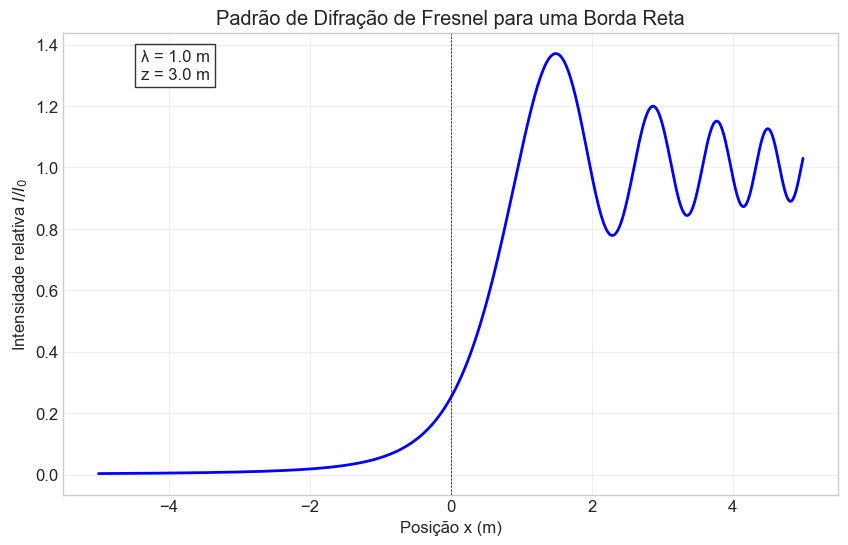

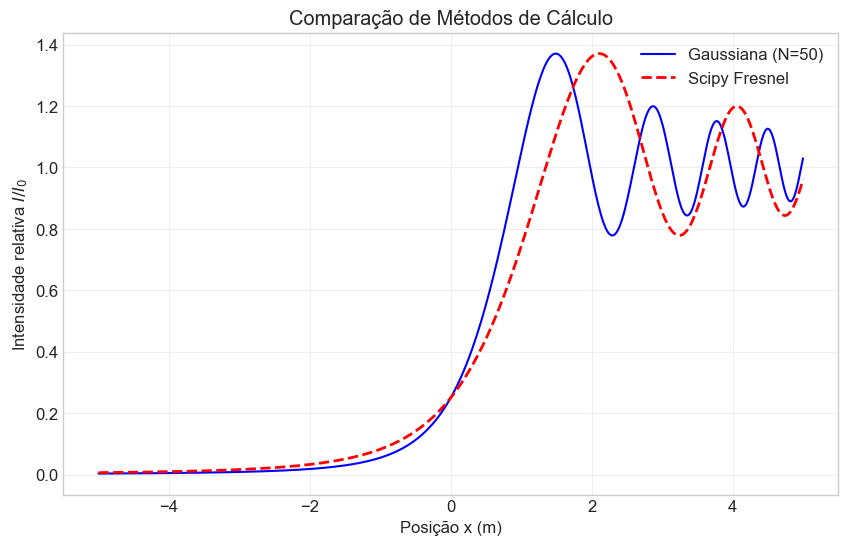

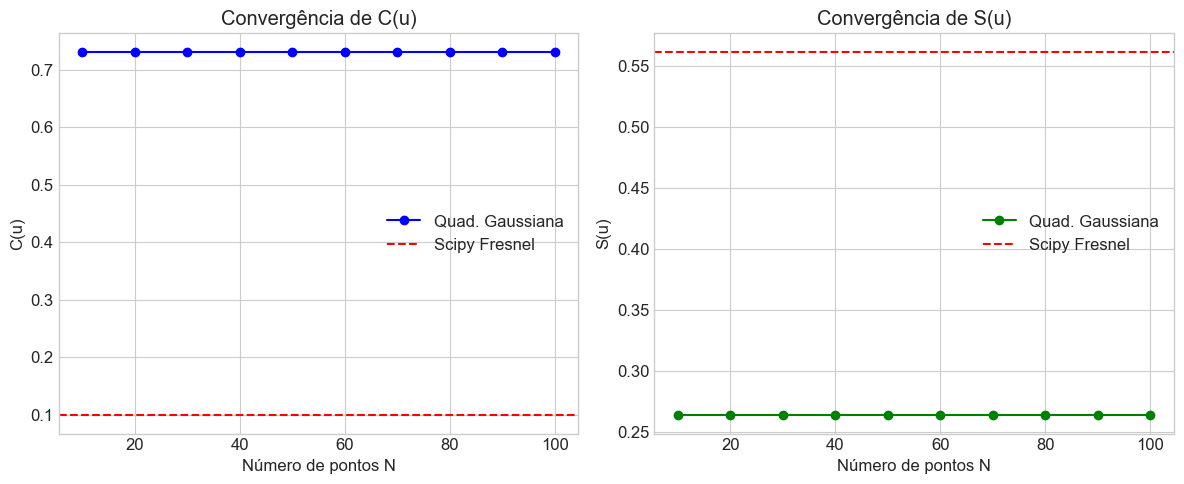

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad
from scipy.special import fresnel

# Parâmetros físicos do problema
lambda_ = 1.0  # Comprimento de onda (m)
z = 3.0        # Distância após a borda (m)

# Funções de Fresnel usando quadratura gaussiana
def C(u, N=50):
    """Integral de Fresnel cosseno usando quadratura gaussiana"""
    integrand = lambda t: np.cos(0.5 * np.pi * t**2)
    result, _ = fixed_quad(integrand, 0, u, n=N)
    return result

def S(u, N=50):
    """Integral de Fresnel seno usando quadratura gaussiana"""
    integrand = lambda t: np.sin(0.5 * np.pi * t**2)
    result, _ = fixed_quad(integrand, 0, u, n=N)
    return result

# Cálculo da intensidade relativa I/I0
def intensity_ratio(x, lambda_, z):
    """Calcula a intensidade difratada relativa I/I0"""
    u = x * np.sqrt(2 / (lambda_ * z))
    C_u = C(u)
    S_u = S(u)
    return ((2*C_u + 1)**2 + (2*S_u + 1)**2) / 8

# Valores de x para o gráfico
x_values = np.linspace(-5, 5, 500)  # De -5m a 5m

# Calculando I/I0 para cada x
I_I0_values = [intensity_ratio(x, lambda_, z) for x in x_values]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_values, I_I0_values, 'b-', linewidth=2)
plt.title('Padrão de Difração de Fresnel para uma Borda Reta')
plt.xlabel('Posição x (m)')
plt.ylabel('Intensidade relativa $I/I_0$')
plt.grid(True, alpha=0.3)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)  # Linha da borda
plt.text(0.1, 0.9, f'λ = {lambda_} m\nz = {z} m', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

# Verificação com funções especiais (para comparação)
# Usando scipy.special.fresnel que calcula ambas as integrais de Fresnel
def intensity_ratio_scipy(x, lambda_, z):
    """Versão usando funções especiais do scipy para comparação"""
    u = x * np.sqrt(2 / (lambda_ * z))
    S_scipy, C_scipy = fresnel(u / np.sqrt(2))  # Note o fator de escala diferente
    return ((2*C_scipy + 1)**2 + (2*S_scipy + 1)**2) / 8

I_I0_scipy = [intensity_ratio_scipy(x, lambda_, z) for x in x_values]

# Plot comparativo
plt.figure(figsize=(10, 6))
plt.plot(x_values, I_I0_values, 'b-', label='Gaussiana (N=50)')
plt.plot(x_values, I_I0_scipy, 'r--', label='Scipy Fresnel', linewidth=2)
plt.title('Comparação de Métodos de Cálculo')
plt.xlabel('Posição x (m)')
plt.ylabel('Intensidade relativa $I/I_0$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Análise de convergência para um ponto específico (x=1.0)
x_test = 1.0
u_test = x_test * np.sqrt(2 / (lambda_ * z))
N_values = np.arange(10, 101, 10)
C_values = [C(u_test, N) for N in N_values]
S_values = [S(u_test, N) for N in N_values]
C_scipy, S_scipy = fresnel(u_test / np.sqrt(2))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(N_values, C_values, 'bo-', label='Quad. Gaussiana')
plt.axhline(C_scipy, color='r', linestyle='--', label='Scipy Fresnel')
plt.title('Convergência de C(u)')
plt.xlabel('Número de pontos N')
plt.ylabel('C(u)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(N_values, S_values, 'go-', label='Quad. Gaussiana')
plt.axhline(S_scipy, color='r', linestyle='--', label='Scipy Fresnel')
plt.title('Convergência de S(u)')
plt.xlabel('Número de pontos N')
plt.ylabel('S(u)')
plt.legend()

plt.tight_layout()
plt.show()

# Questão 3

![alt text](Questão3_a.png)

![alt text](Questão3_b.png)